# PyOhio 2018 Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
print('pandas version = ' + pd.__version__)

pandas version = 0.23.0


In [2]:
raw = pd.read_csv('cars.csv')
raw.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1/1/1970
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1/1/1970
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1/1/1970
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1/1/1970
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1/1/1970


In [3]:
n_rows, n_cols = raw.shape
print('Number of Columns = ' + str(n_cols) + '; Number of Rows = ' + str(n_rows))

Number of Columns = 9; Number of Rows = 406


In [4]:
raw['Year'].unique()

array(['1/1/1970', '1/1/1971', '1/1/1972', '1/1/1973', '1/1/1974',
       '1/1/1975', '1/1/1976', '1/1/1977', '1/1/1978', '1/1/1979',
       '1/1/1980', '1/1/1982'], dtype=object)

## 1 - Identify a Single Task to Perform on 1 Piece of Data


In [5]:
date = raw.loc[0, 'Year']
date

'1/1/1970'

In [6]:
year = int(date[-4:])
year

1970

In [22]:
clean = raw.copy(deep=True)

date = clean.loc[0, 'Year']
year = int(date[-4:])

clean.loc[0, 'Year'] = year
clean.head(3)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1/1/1970
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1/1/1970


## 3 Make The Task a Function

In [8]:
def get_year(date):
    year = int(date[-4:])
    return year

## 4 Apply Task to All Data

In [9]:
clean = raw.copy(deep=True)

for index, clean_row in clean.iterrows():
    date = clean_row['Year']
    year = get_year(date)
    clean.loc[index, 'Year'] = year

clean['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1982], dtype=int64)

In [24]:
clean = raw.copy(deep=True)

clean['Year'] = clean['Year'].apply(get_year)
display(clean['Year'].unique())

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1982], dtype=int64)

## Check Result

In [27]:
display(clean.head(3))
display(clean['Year'].unique())

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970


array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1982], dtype=int64)

# Task: Visualize Trends Over Time
## 2 Single Instance of Task

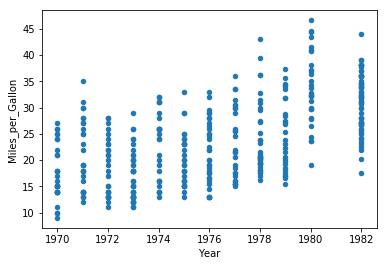

In [31]:
clean.plot(x='Year', y='Miles_per_Gallon', kind='scatter')

plt.show()

## 4 Apply task to all data

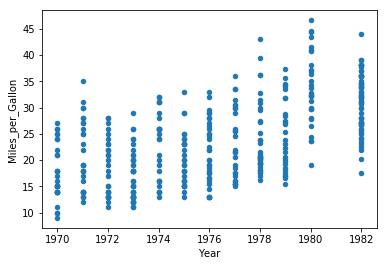

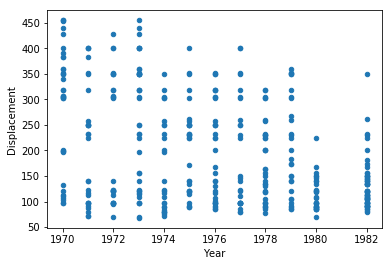

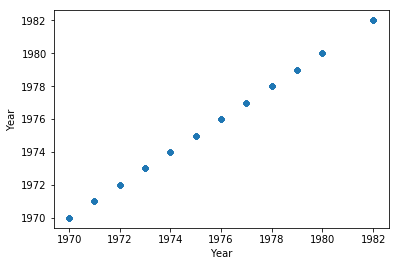

In [13]:
plot_columns = ['Miles_per_Gallon', 'Displacement', 'Year']

for plot_column in plot_columns:
    clean.plot(x='Year', y=plot_column, kind='scatter')
    plt.show()

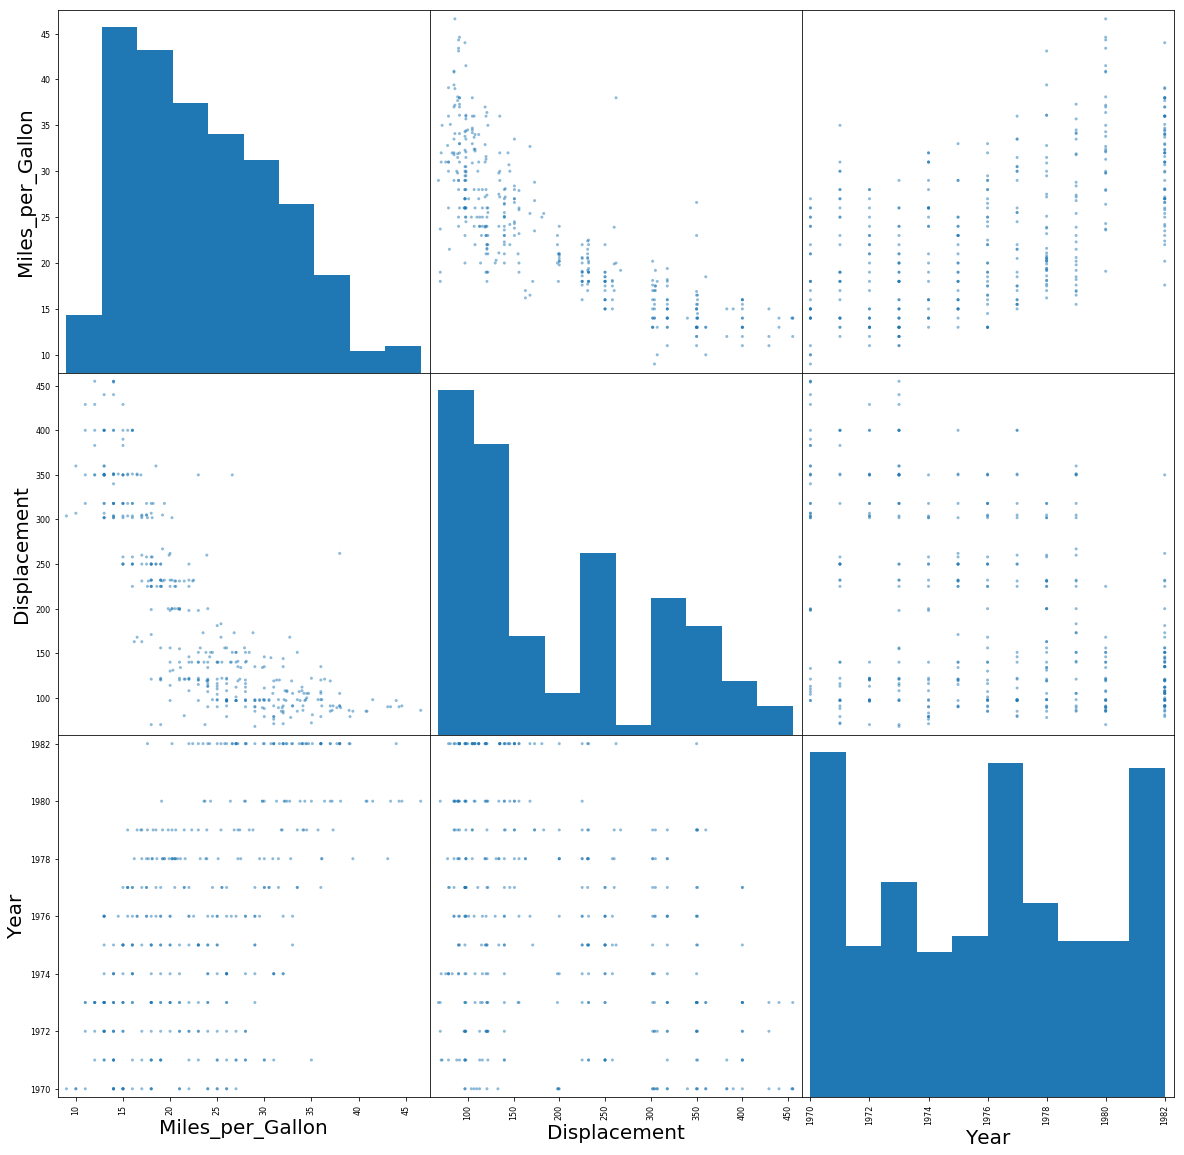

In [21]:
plot_data = clean.loc[:, plot_columns]
axes = pd.plotting.scatter_matrix(plot_data, figsize=(20, 20), diagonal='hist')

for row in axes:
    for axis in row:
        axis.yaxis.label.set_size(20)
        axis.xaxis.label.set_size(20)
plt.show()

In [32]:
clean.groupby('Year', as_index=False).mean().head()

,Year,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
0,1970,12.714286,6.857143,286.857143,148.857143,17.689655,3441.314286
1,1971,15.310345,5.517241,205.862069,104.928571,21.250000,2960.344828
2,1972,15.125000,5.821429,218.375000,120.178571,18.714286,3237.714286
3,1973,14.312500,6.375000,256.875000,130.475000,17.100000,3419.025000
4,1974,16.203704,5.259259,171.740741,94.230769,22.703704,2877.925926


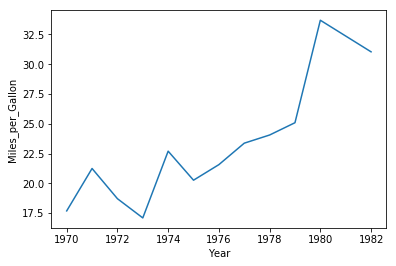

In [31]:
clean.groupby('Year')['Miles_per_Gallon'].mean().plot()

plt.ylabel('Miles_per_Gallon')
plt.show()

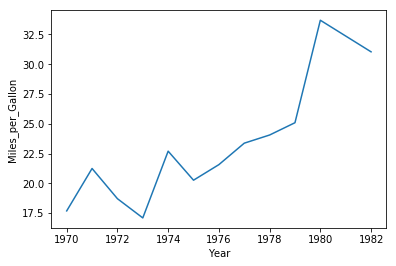

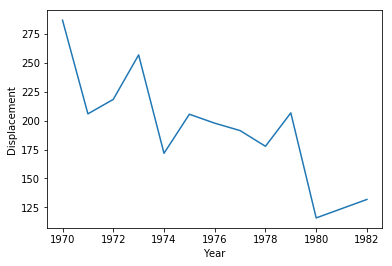

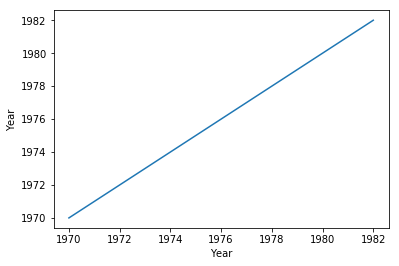

In [22]:
for plot_column in plot_columns:
    clean.groupby('Year')[plot_column].mean().plot()

    plt.ylabel(plot_column)
    plt.show()

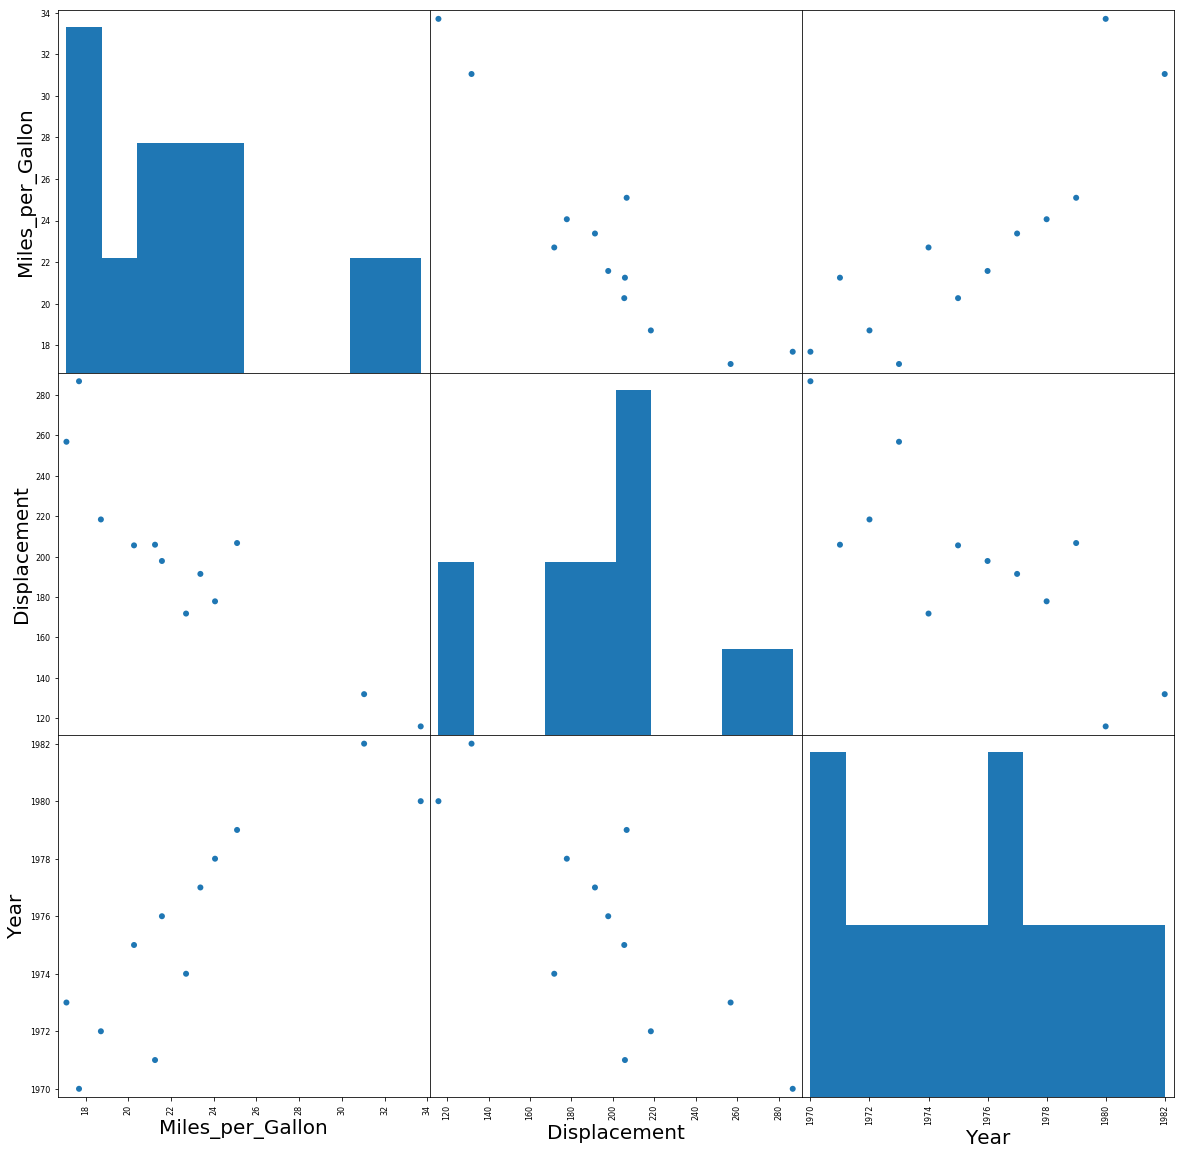

In [34]:
grouped_plot_data = plot_data.groupby('Year', as_index=False).mean().loc[:, plot_columns]
axes = pd.plotting.scatter_matrix(grouped_plot_data, figsize=(20, 20), marker='o', alpha=1)

for row in axes:
    for axis in row:
        axis.yaxis.label.set_size(20)
        axis.xaxis.label.set_size(20)
plt.show()

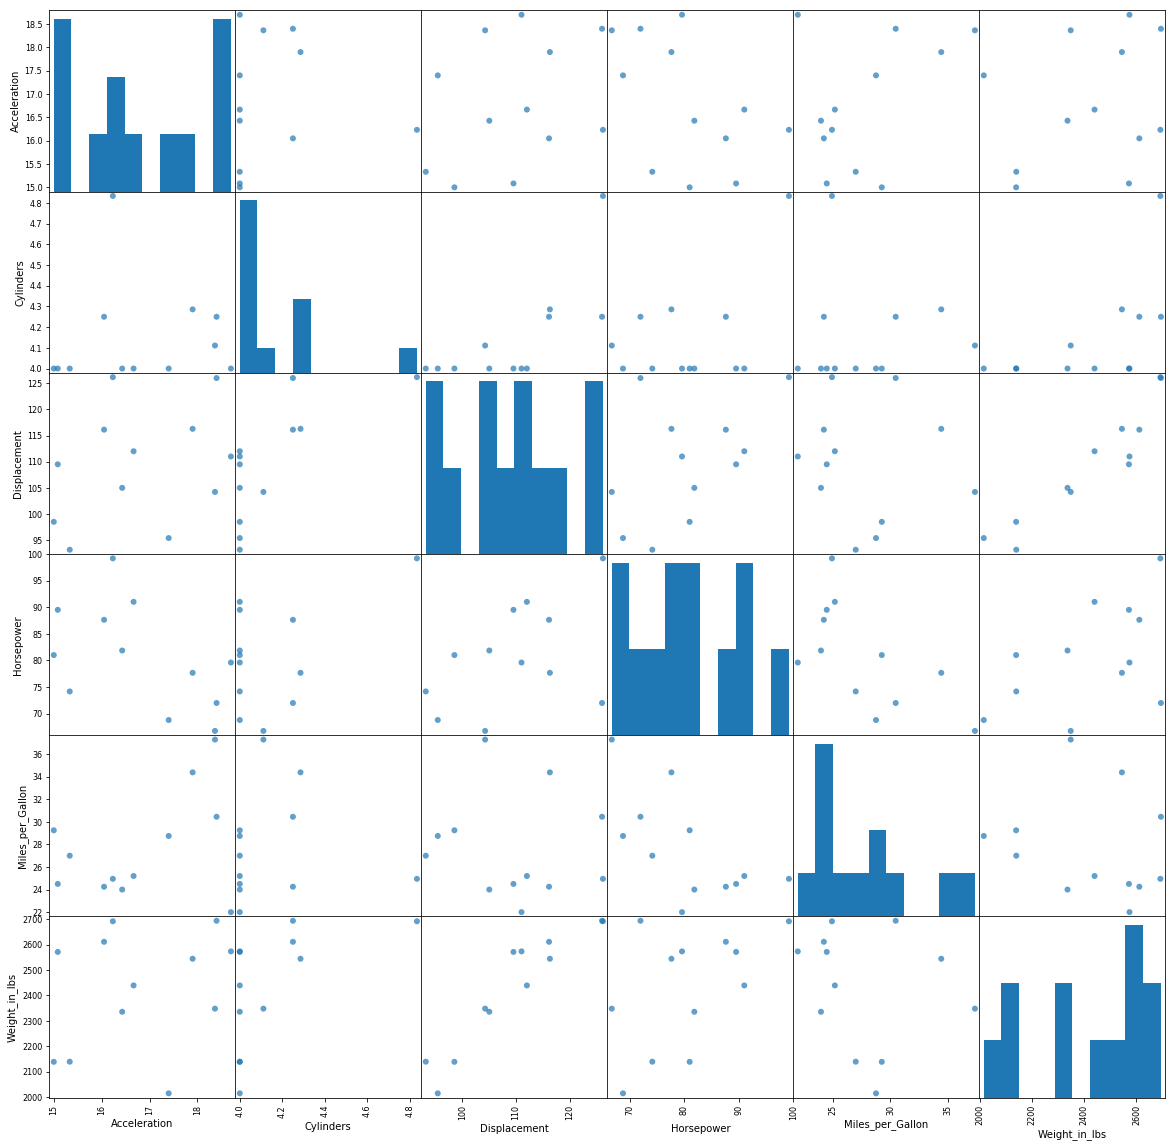

In [39]:
pd.plotting.scatter_matrix(clean.groupby(['Origin', 'Year']).mean().loc['Europe'], figsize=(20, 20), marker='o', alpha=0.7)
plt.show()